#Notebook Case VAI Store - Grupo 5

Nesse Notebook serão mostradas as principais análises feitas sobre os dados conclusões tomadas, assim como o modelo de previsão da demanda de produtos.

Bibliotecas utilizadas:

##1. Resumo do Case

A VAI Store é uma loja de varejo que atua no mercado de alimentação saudável há mais de uma década, com unidades físicas na região Sudeste do Brasil e, mais recentemente, com vendas online.

No entanto, a VAI Store vem enfrentando dificuldades para compreender e utilizar os dados disponíveis com o objetivo de melhorar a experiência dos clientes e aumentar suas vendas.

Nosso objetivo, até o final deste notebook, é utilizar as análises e o modelo gerado para esclarecer o significado dos dados da loja e, a partir disso, criar planos de ação que ajudem a solucionar as dificuldades mencionadas acima. Além disso, um dos pontos de interesse da loja são as análises a respeito do produto SKU 1813, que serão abordadas neste notebook.

##2. Aquisição e Tratamento dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#produto_df = pd.read_csv('DadosProjeto/produto.csv')
#vendas_df = pd.read_csv('DadosProjeto/vendas.csv')
produto_df = pd.read_csv('/content/produto.csv')
vendas_df = pd.read_csv('/content/vendas.csv')

In [5]:
produto_df.head()

,SKU,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA
0,3.0,COCO RALADO GROSSO KG ...,Doceria,Confeitaria
1,4.0,ICE TEA LEAO LATA 340ML ...,NaN,NaN
2,5.0,TAHINE ISTAMBUL 200G ...,Pelo Mundo,Pastas Árabes
3,6.0,AMENDOIM MOIDO KG ...,Castanhas & Oleaginosas,Oleaginosas moídas
4,7.0,HALAWI ISTAMBUL LATA 500G ...,Pelo Mundo,Pastas Árabes


In [6]:
produto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SKU           6499 non-null   float64
 1   NOME_PRODUTO  6499 non-null   object 
 2   CATEGORIA     4498 non-null   object 
 3   SUBCATEGORIA  4498 non-null   object 
dtypes: float64(1), object(3)
memory usage: 203.3+ KB


In [7]:
vendas_df.head()

,COD_ATEND,COD_VENDA,COD_FILIAL,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF
0,000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,101042,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220
1,000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,101032,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf
2,000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055
3,000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe
4,000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,101032,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394


In [8]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556198 entries, 0 to 556197
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COD_ATEND    556198 non-null  object 
 1   COD_VENDA    556198 non-null  object 
 2   COD_FILIAL   556198 non-null  int64  
 3   FILIAL       556198 non-null  object 
 4   DATA_ATEND   556198 non-null  object 
 5   SKU          556198 non-null  int64  
 6   UNID         556198 non-null  object 
 7   QTD_VENDA    556198 non-null  float64
 8   FATUR_VENDA  556198 non-null  float64
 9   CLI_CPF      556198 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 42.4+ MB


In [9]:
print(produto_df.isna().sum())

print(vendas_df.isna().sum())

SKU                1
NOME_PRODUTO       1
CATEGORIA       2002
SUBCATEGORIA    2002
dtype: int64
COD_ATEND      0
COD_VENDA      0
COD_FILIAL     0
FILIAL         0
DATA_ATEND     0
SKU            0
UNID           0
QTD_VENDA      0
FATUR_VENDA    0
CLI_CPF        0
dtype: int64


In [10]:
#Dropando o produto que não possui SKU
produto_df = produto_df.dropna(subset=['SKU'],axis=0)

In [11]:
vendas_df.describe()

,COD_FILIAL,SKU,QTD_VENDA,FATUR_VENDA
count,556198.000000,556198.000000,556198.000000,556198.000000
mean,101036.799028,6180.184127,0.280890,14.111390
std,4.995964,6854.352241,0.516884,29.043274
min,101032.000000,9.000000,0.002000,0.030000
25%,101032.000000,264.000000,0.102000,4.470000
50%,101032.000000,2987.000000,0.154000,7.820000
75%,101042.000000,13778.000000,0.269000,14.260000
max,101042.000000,24706.000000,100.700000,4994.760000


Alguns tipos de dados precisam ser alterados, como COD_FILIAL e SKU, que são apresentados como inteiros mas se comportam como strings

In [12]:
vendas_df['COD_FILIAL'].value_counts()

,count
COD_FILIAL,
101032,289277
101042,266921


Analisando os valores possíveis para COD_FILIAL percebemos que só há dois valores, o que pode indicar sobreposição com a variável FILIAL

<Axes: xlabel='COD_FILIAL', ylabel='FILIAL'>

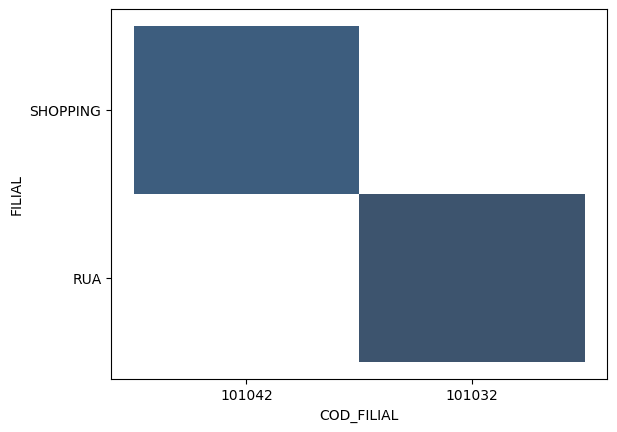

In [13]:
#Alterando COD_FILIAL para string
vendas_df['COD_FILIAL'] = vendas_df['COD_FILIAL'].astype('string')
#Verificando a relação com FILIAL
sns.histplot(x=vendas_df.COD_FILIAL,y=vendas_df.FILIAL)

Com isso podemos ver que indicam a mesma variável e podemos remover uma delas

In [14]:
vendas_df = vendas_df.drop('COD_FILIAL',axis=1)

In [15]:
#Alterando SKU para string nos dois dfs
produto_df['SKU'] = produto_df['SKU'].astype(int)
produto_df['SKU'] = produto_df['SKU'].astype('string')
vendas_df['SKU'] = vendas_df['SKU'].astype('string')


In [16]:
#Fazendo merge das duas df's
vendas_produtos_df = pd.merge(vendas_df,produto_df,on='SKU')
vendas_produtos_df.head()

,COD_ATEND,COD_VENDA,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA
0,000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju
1,000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju
2,000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju
3,000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju
4,000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394,NOZES S/C PARTIDA EXTRA LIGHT KG ...,Castanhas & Oleaginosas,Nozes


In [17]:
#Alterando DATA_ATEND para o formato datetime
vendas_produtos_df['DATA_ATEND'] = pd.to_datetime(vendas_produtos_df['DATA_ATEND'], infer_datetime_format=True)

#Criando Colunas auxiliares que indicam data mais especificamente
vendas_produtos_df['Ano'] = vendas_produtos_df['DATA_ATEND'].dt.year
vendas_produtos_df['Mes'] = vendas_produtos_df['DATA_ATEND'].dt.month
vendas_produtos_df['Dia_Semana'] = vendas_produtos_df['DATA_ATEND'].dt.dayofweek

vendas_produtos_df.head()

<ipython-input-17-1ccd16db4b36>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vendas_produtos_df['DATA_ATEND'] = pd.to_datetime(vendas_produtos_df['DATA_ATEND'], infer_datetime_format=True)


,COD_ATEND,COD_VENDA,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA,Ano,Mes,Dia_Semana
0,000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju,2024,1,1
1,000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju,2024,1,1
2,000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju,2024,1,1
3,000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe,CAST DE CAJU W4TS TOR C/SAL LUXO KG ...,Castanhas & Oleaginosas,Castanhas de Caju,2024,1,1
4,000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394,NOZES S/C PARTIDA EXTRA LIGHT KG ...,Castanhas & Oleaginosas,Nozes,2024,1,1


In [18]:
vendas_produtos_df['Ano'].value_counts()

,count
Ano,
2024,556198


Podemos ver que estamos tratando de vendas de produtos da VAI Store apenas durante o ano de 2024

##3. Análise Exploratória de Dados

Primeiramente, vamos analisar comportamentos do Faturamento e da Quantidade Vendida ao longo de 2024, e como essas duas variáveis se relacionam com as outras

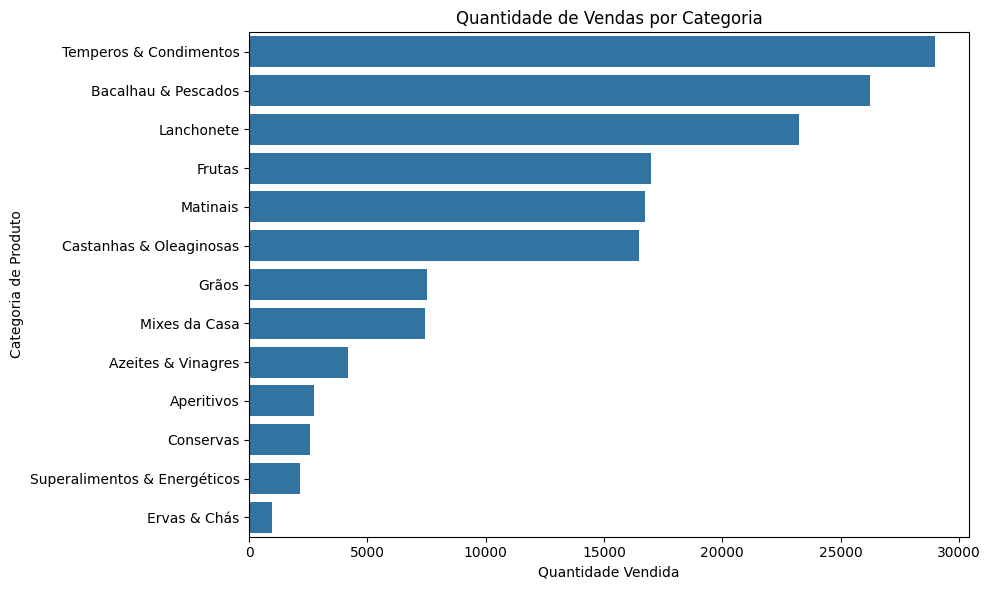

In [19]:
vendas_por_categoria = vendas_produtos_df.groupby('CATEGORIA')['QTD_VENDA'].sum().reset_index()
vendas_por_categoria = vendas_por_categoria.sort_values(by='QTD_VENDA', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_por_categoria, x='QTD_VENDA', y='CATEGORIA')
plt.title('Quantidade de Vendas por Categoria')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()

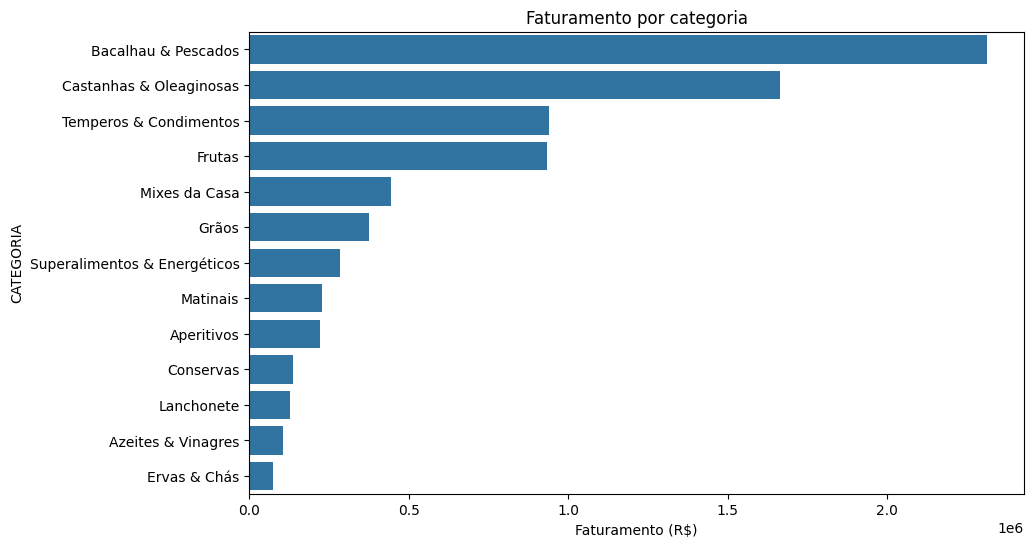

In [20]:
categoria_faturamento = vendas_produtos_df.groupby('CATEGORIA')['FATUR_VENDA'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_faturamento.values, y=categoria_faturamento.index)
plt.title('Faturamento por categoria')
plt.xlabel('Faturamento (R$)')
plt.show()


É possível notar que o faturamento da loja vem em grande parte da venda de bacalhau e pescados.

Vamos então analisar como se comporta a distribuição de vendas de bacalhau e outros pescados durante o ano

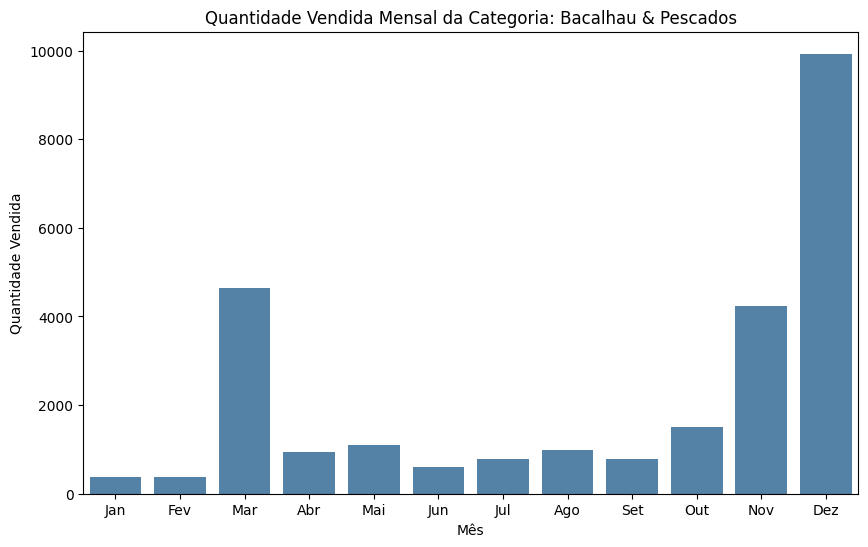

In [21]:
# Converter a coluna DATA_ATEND para datetime, se ainda não fez
vendas_produtos_df['DATA_ATEND'] = pd.to_datetime(vendas_produtos_df['DATA_ATEND'])

# Escolher a categoria
categoria_escolhida = 'Bacalhau & Pescados'
df_categoria = vendas_produtos_df[vendas_produtos_df['CATEGORIA'] == categoria_escolhida].copy()

# Criar coluna de mês
df_categoria['Mes'] = df_categoria['DATA_ATEND'].dt.month

# Agrupar por mês somando a quantidade vendida
vendas_mensais = df_categoria.groupby('Mes')['QTD_VENDA'].sum().reset_index()

# Plotar
plt.figure(figsize=(10,6))
sns.barplot(data=vendas_mensais, x='Mes', y='QTD_VENDA', color='steelblue')
plt.title(f'Quantidade Vendida Mensal da Categoria: {categoria_escolhida}')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.xticks(range(0,12),
           ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

Podemos perceber um aumento considerável em Março e nos mêses próximos a Dezembro, mêses que são marcados por eventos onde há tradição de consumir bacalhau (Páscoa e Natal/Ano Novo)

##4. Modelagem

Nesta etapa, foi construído um DataFrame consolidado contendo todas as variáveis de interesse que poderão ser utilizadas no modelo de previsão futuras. O objetivo é viabilizar tanto a previsão da quantidade vendida de um produto específico em determinada filial, quanto a estimativa da demanda agregada de uma categoria. Esse DataFrame servirá como base para os modelos preditivos a serem desenvolvidos.

In [59]:
# Cria uma coluna de quantidade vendida para cada SKU
df_vendas_produto = vendas_produtos_df.groupby(['DATA_ATEND','SKU'], as_index=False).agg({'QTD_VENDA':'sum'})
df_pivot_sku = df_vendas_produto.pivot(index='DATA_ATEND', columns='SKU', values='QTD_VENDA').fillna(0)

# Cria uma coluna de quantidade vendida para cada Categoria
df_vendas_categoria= vendas_produtos_df.groupby(['DATA_ATEND','CATEGORIA'], as_index=False).agg({'QTD_VENDA':'sum'})
df_pivot_categoria = df_vendas_categoria.pivot(index='DATA_ATEND', columns='CATEGORIA', values='QTD_VENDA').fillna(0)

# Cria uma coluna de quantidade vendida para cada combinacao SKU_FILIAL
df_vendas_produto_filial = vendas_produtos_df.groupby(['DATA_ATEND','SKU','FILIAL'], as_index=False).agg({'QTD_VENDA':'sum'})
df_vendas_produto_filial['ID'] = df_vendas_produto_filial['SKU'] + '_'  + df_vendas_produto_filial['FILIAL']
df_pivot_sku_filial = df_vendas_produto_filial.pivot(index='DATA_ATEND', columns='ID', values='QTD_VENDA').fillna(0)

# Cria uma coluna de quantidade vendida para cada combinacao CATEGORIA_FILIAL
df_vendas_filial = vendas_produtos_df.groupby(['DATA_ATEND','CATEGORIA','FILIAL'], as_index=False).agg({'QTD_VENDA':'sum','FATUR_VENDA':'sum'})
df_vendas_filial['ID'] = df_vendas_filial['CATEGORIA'] + '_'  + df_vendas_filial['FILIAL']
df_pivot_categoria_filial = df_vendas_filial.pivot(index='DATA_ATEND', columns='ID', values='QTD_VENDA').fillna(0)


df =  pd.concat([df_pivot_sku, df_pivot_categoria, df_pivot_sku_filial, df_pivot_categoria_filial], axis=1)
df


,1017,1062,13778,13805,15844,15850,161,16923,16984,17048,...,Lanchonete_RUA,Lanchonete_SHOPPING,Matinais_RUA,Matinais_SHOPPING,Mixes da Casa_RUA,Mixes da Casa_SHOPPING,Superalimentos & Energéticos_RUA,Superalimentos & Energéticos_SHOPPING,Temperos & Condimentos_RUA,Temperos & Condimentos_SHOPPING
DATA_ATEND,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.704,7.0,4.818,6.839,5.370,3.077,4.548,2.542,1.272,3.891,...,0.0,7.0,27.594,16.882,9.050,7.609,2.924,2.446,32.448,31.152
2024-01-03,1.204,47.0,6.804,8.873,3.912,3.224,3.812,3.448,2.892,6.423,...,6.0,41.0,25.270,18.787,9.896,9.534,1.892,2.020,34.094,35.398
2024-01-04,1.624,24.0,6.792,9.822,5.376,3.571,4.104,5.184,2.102,5.352,...,0.0,24.0,24.182,24.406,12.840,10.550,2.690,2.686,40.547,39.910
2024-01-05,1.156,33.0,7.263,9.369,3.840,5.248,5.872,4.341,3.414,8.805,...,0.0,33.0,35.485,30.684,11.050,11.868,2.014,1.826,51.382,50.335
2024-01-06,1.260,60.0,9.870,8.349,4.410,3.730,4.292,4.394,1.515,5.627,...,32.0,28.0,18.019,27.498,4.204,14.177,1.656,2.754,32.231,52.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,2.054,23.0,6.464,8.474,4.379,5.824,5.539,4.483,2.208,6.930,...,1.0,22.0,25.346,9.082,10.617,6.339,3.224,1.155,39.496,31.565
2024-12-28,3.620,36.0,7.402,12.797,6.400,9.297,5.252,3.571,3.974,6.903,...,0.0,36.0,17.643,18.807,14.294,8.877,2.730,3.670,26.077,47.151
2024-12-29,0.926,4.0,1.288,4.591,1.808,2.624,1.025,1.501,0.940,1.724,...,0.0,4.0,0.000,8.156,0.000,5.691,0.000,1.808,0.000,21.036


In [50]:
# Lista de todos parametros que poderemos utilizar no nosso modelo de previsão
for x in df_vendas.columns:
  print(x)

1017
1062
13778
13805
15844
15850
161
16923
16984
17048
173
17438
17495
1813
191
199
2033
2075
22789
23242
23243
23554
23980
23981
24072
2458
24706
248
2576
264
266
271
2770
2937
2938
2987
3075
3407
3449
3641
4239
4446
4871
51
6159
6404
65
6507
66
6628
6720
6854
7790
785
86
87
8876
9
9969
Aperitivos
Azeites & Vinagres
Bacalhau & Pescados
Castanhas & Oleaginosas
Conservas
Ervas & Chás
Frutas
Grãos
Lanchonete
Matinais
Mixes da Casa
Superalimentos & Energéticos
Temperos & Condimentos
1017_RUA
1017_SHOPPING
1062_RUA
1062_SHOPPING
13778_RUA
13778_SHOPPING
13805_RUA
13805_SHOPPING
15844_RUA
15844_SHOPPING
15850_RUA
15850_SHOPPING
161_RUA
161_SHOPPING
16923_RUA
16923_SHOPPING
16984_RUA
16984_SHOPPING
17048_RUA
17048_SHOPPING
173_RUA
173_SHOPPING
17438_RUA
17438_SHOPPING
17495_RUA
17495_SHOPPING
1813_RUA
1813_SHOPPING
191_RUA
191_SHOPPING
199_RUA
199_SHOPPING
2033_RUA
2033_SHOPPING
2075_RUA
2075_SHOPPING
22789_RUA
22789_SHOPPING
23242_RUA
23242_SHOPPING
23243_RUA
23243_SHOPPING
23554_RUA
23554

In [110]:
df_vendas[['Bacalhau & Pescados_RUA']]

,Bacalhau & Pescados_RUA
0,1.206
1,4.328
2,3.894
3,3.320
4,2.405
...,...
357,77.506
358,101.583
359,0.000
360,161.890


In [107]:
from prophet import Prophet

def previsao(coluna_previsao, legenda):
# Prepara os dados
  df_vendas = df.reset_index()
  df_prophet = df_vendas[['DATA_ATEND', coluna_previsao]].rename(
    columns={'DATA_ATEND': 'ds', coluna_previsao: 'y'})

# Define feriados
  feriados = pd.DataFrame({
    'holiday': ['Sexta-feira Santa', 'Natal', 'Ano Novo'],
    'ds': pd.to_datetime(['2024-03-29', '2024-12-24', '2024-12-30']),
    'lower_window': [-3, -5, -1],
    'upper_window': [0, 4, 1],
  })



  model = Prophet(holidays=feriados, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
  model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
  model.fit(df_prophet)
  future = model.make_future_dataframe(periods=31, freq='D')
  forecast = model.predict(future)
# Filtrando apenas previsões de janeiro de 2025
  janeiro_2025 = forecast[(forecast['ds'].dt.month == 1) & (forecast['ds'].dt.year == 2025)]

  # Cria os dois gráficos
  fig, axes = plt.subplots(nrows=2, figsize=(24, 12), sharex=False)

  # Gráfico 1: Histórico + Previsão completa
  axes[0].plot(df_prophet['ds'], df_prophet['y'], '.-', color='red', label='Dados Históricos')
  axes[0].plot(forecast['ds'], forecast['yhat'], '-', color='green', label='Previsão')
  axes[0].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.3)
  axes[0].legend()
  axes[0].set_title('Previsão com Prophet - '+legenda)
  axes[0].set_ylabel('Quantidade - KG')

  # Gráfico 2: Apenas a previsão de janeiro de 2025
  axes[1].plot(janeiro_2025['ds'], janeiro_2025['yhat'], 'o-', color='green', label='Previsão Janeiro 2025')
  axes[1].fill_between(janeiro_2025['ds'], janeiro_2025['yhat_lower'], janeiro_2025['yhat_upper'], color='lightgreen', alpha=0.3)
  axes[1].legend()
  axes[1].set_title('Previsão apenas para Janeiro de 2025')
  axes[1].set_xlabel('Data')
  axes[1].set_ylabel('Quantidade - KG')

  plt.tight_layout()
  plt.show()

  soma_janeiro_2025 = janeiro_2025['yhat'].sum()

  soma_janeiro_2025_inf = janeiro_2025['yhat_lower'].sum()
  soma_janeiro_2025_sup = janeiro_2025['yhat_upper'].sum()

  print(f"Previsão total para Janeiro/2025: {soma_janeiro_2025:.2f} KG")
  print(f"Intervalo de confiança: [{soma_janeiro_2025_sup:.2f}, {soma_janeiro_2025_inf:.2f}] KG")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpscv3x529/7fxtukbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpscv3x529/ahwcl7pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94526', 'data', 'file=/tmp/tmpscv3x529/7fxtukbt.json', 'init=/tmp/tmpscv3x529/ahwcl7pw.json', 'output', 'file=/tmp/tmpscv3x529/prophet_modelhnaxtsss/prophet_model-20250605231451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


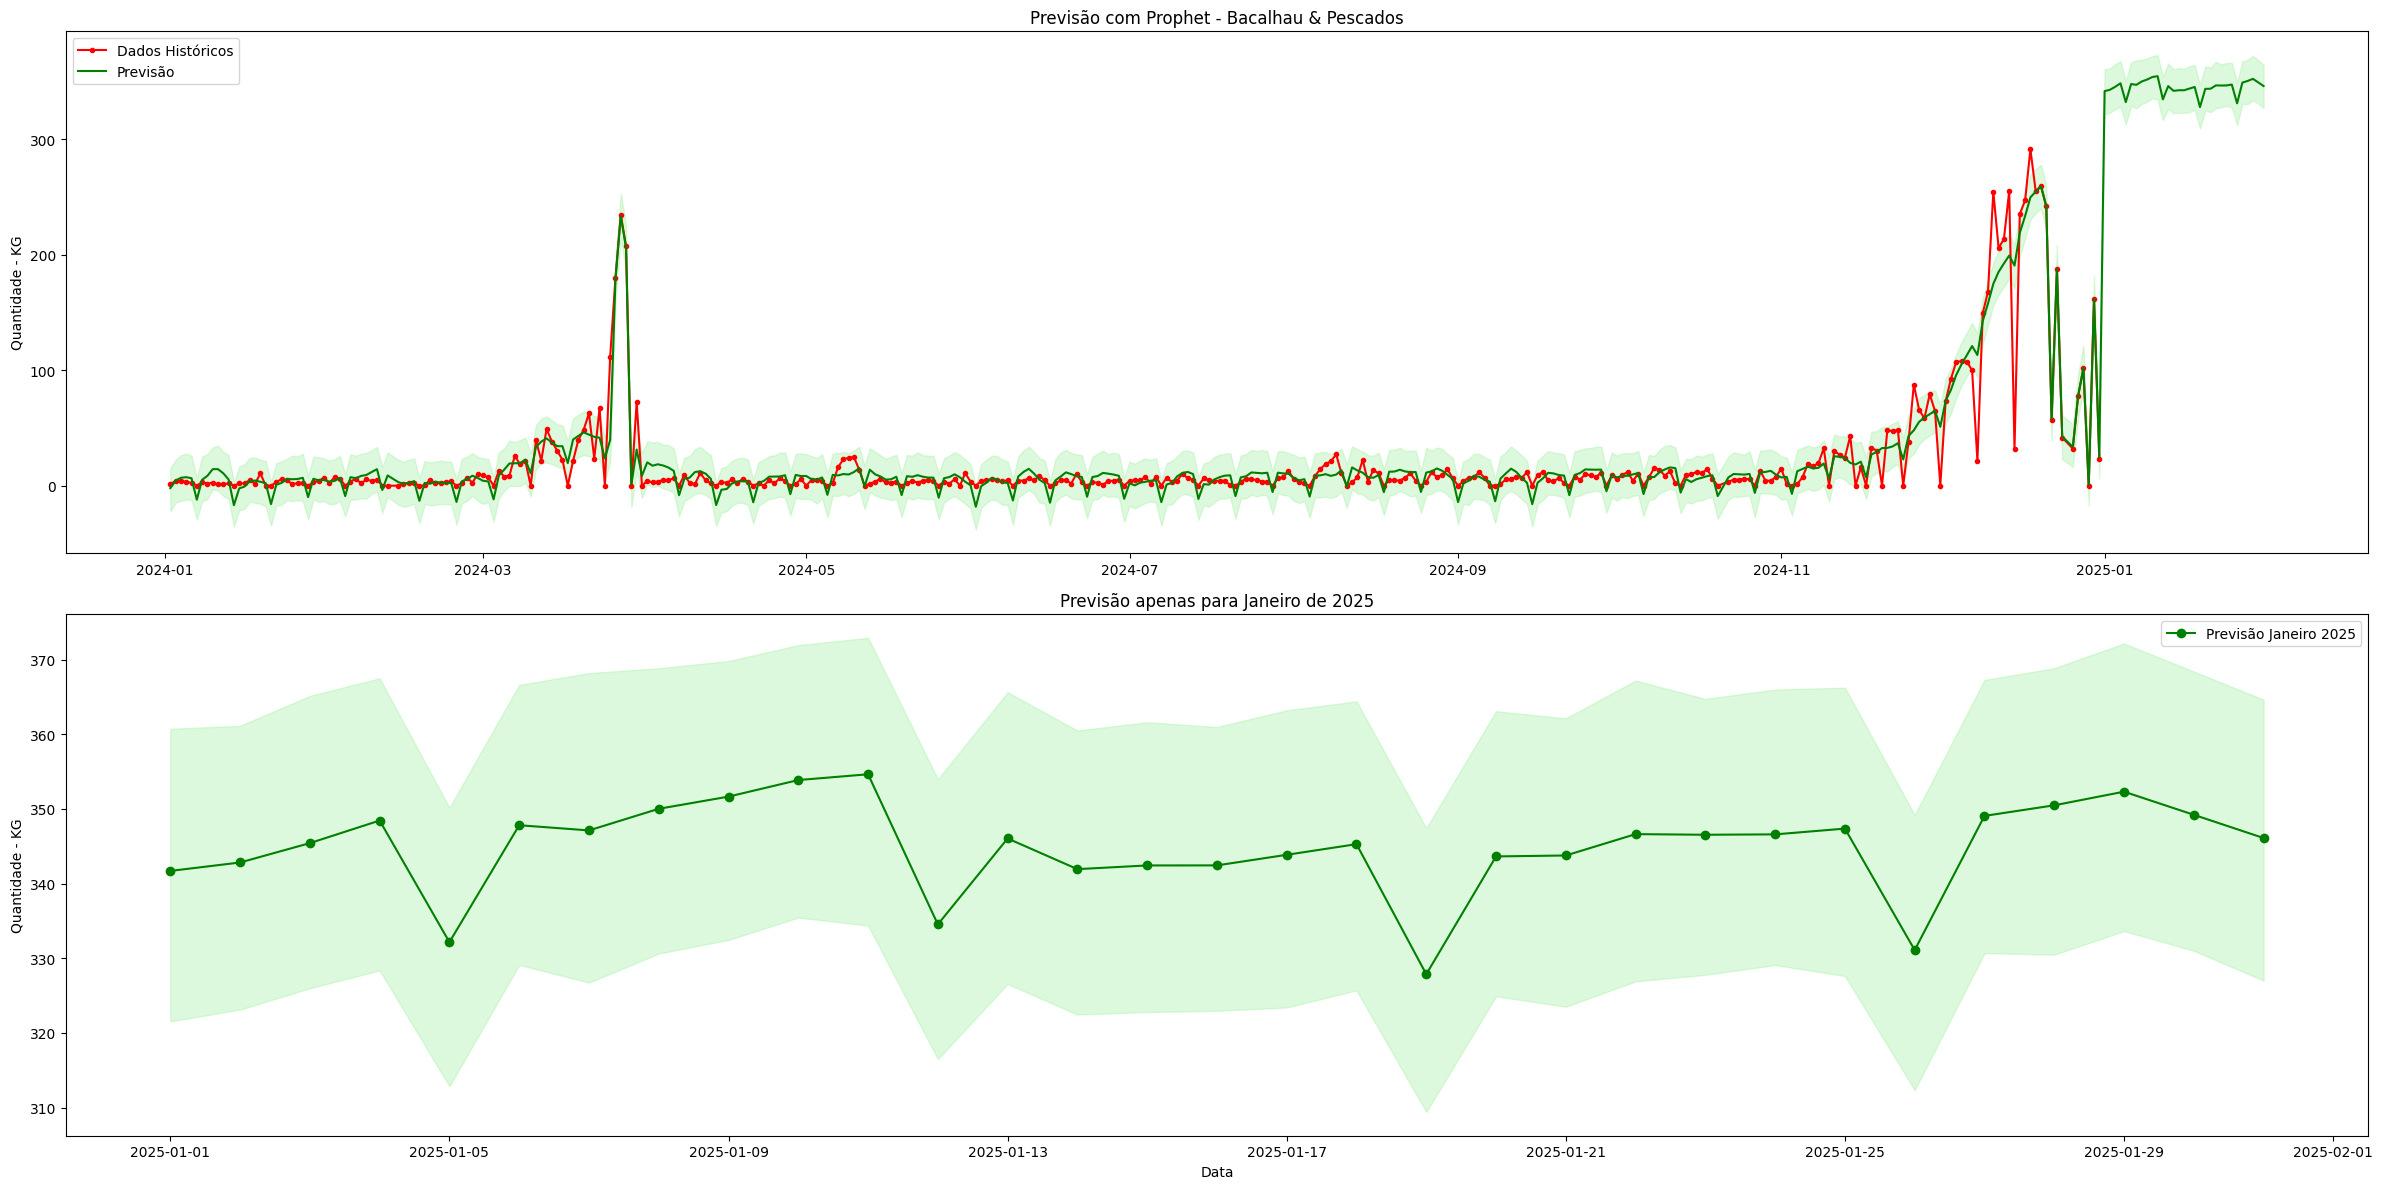

Previsão total para Janeiro/2025: 10692.92 KG
Intervalo de confiança: [11280.60, 10095.64] KG


In [111]:
previsao('Bacalhau & Pescados_RUA', 'Bacalhau & Pescados')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpscv3x529/6f3j83be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpscv3x529/x3c1a898.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65140', 'data', 'file=/tmp/tmpscv3x529/6f3j83be.json', 'init=/tmp/tmpscv3x529/x3c1a898.json', 'output', 'file=/tmp/tmpscv3x529/prophet_model0gmdbr9r/prophet_model-20250605230959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


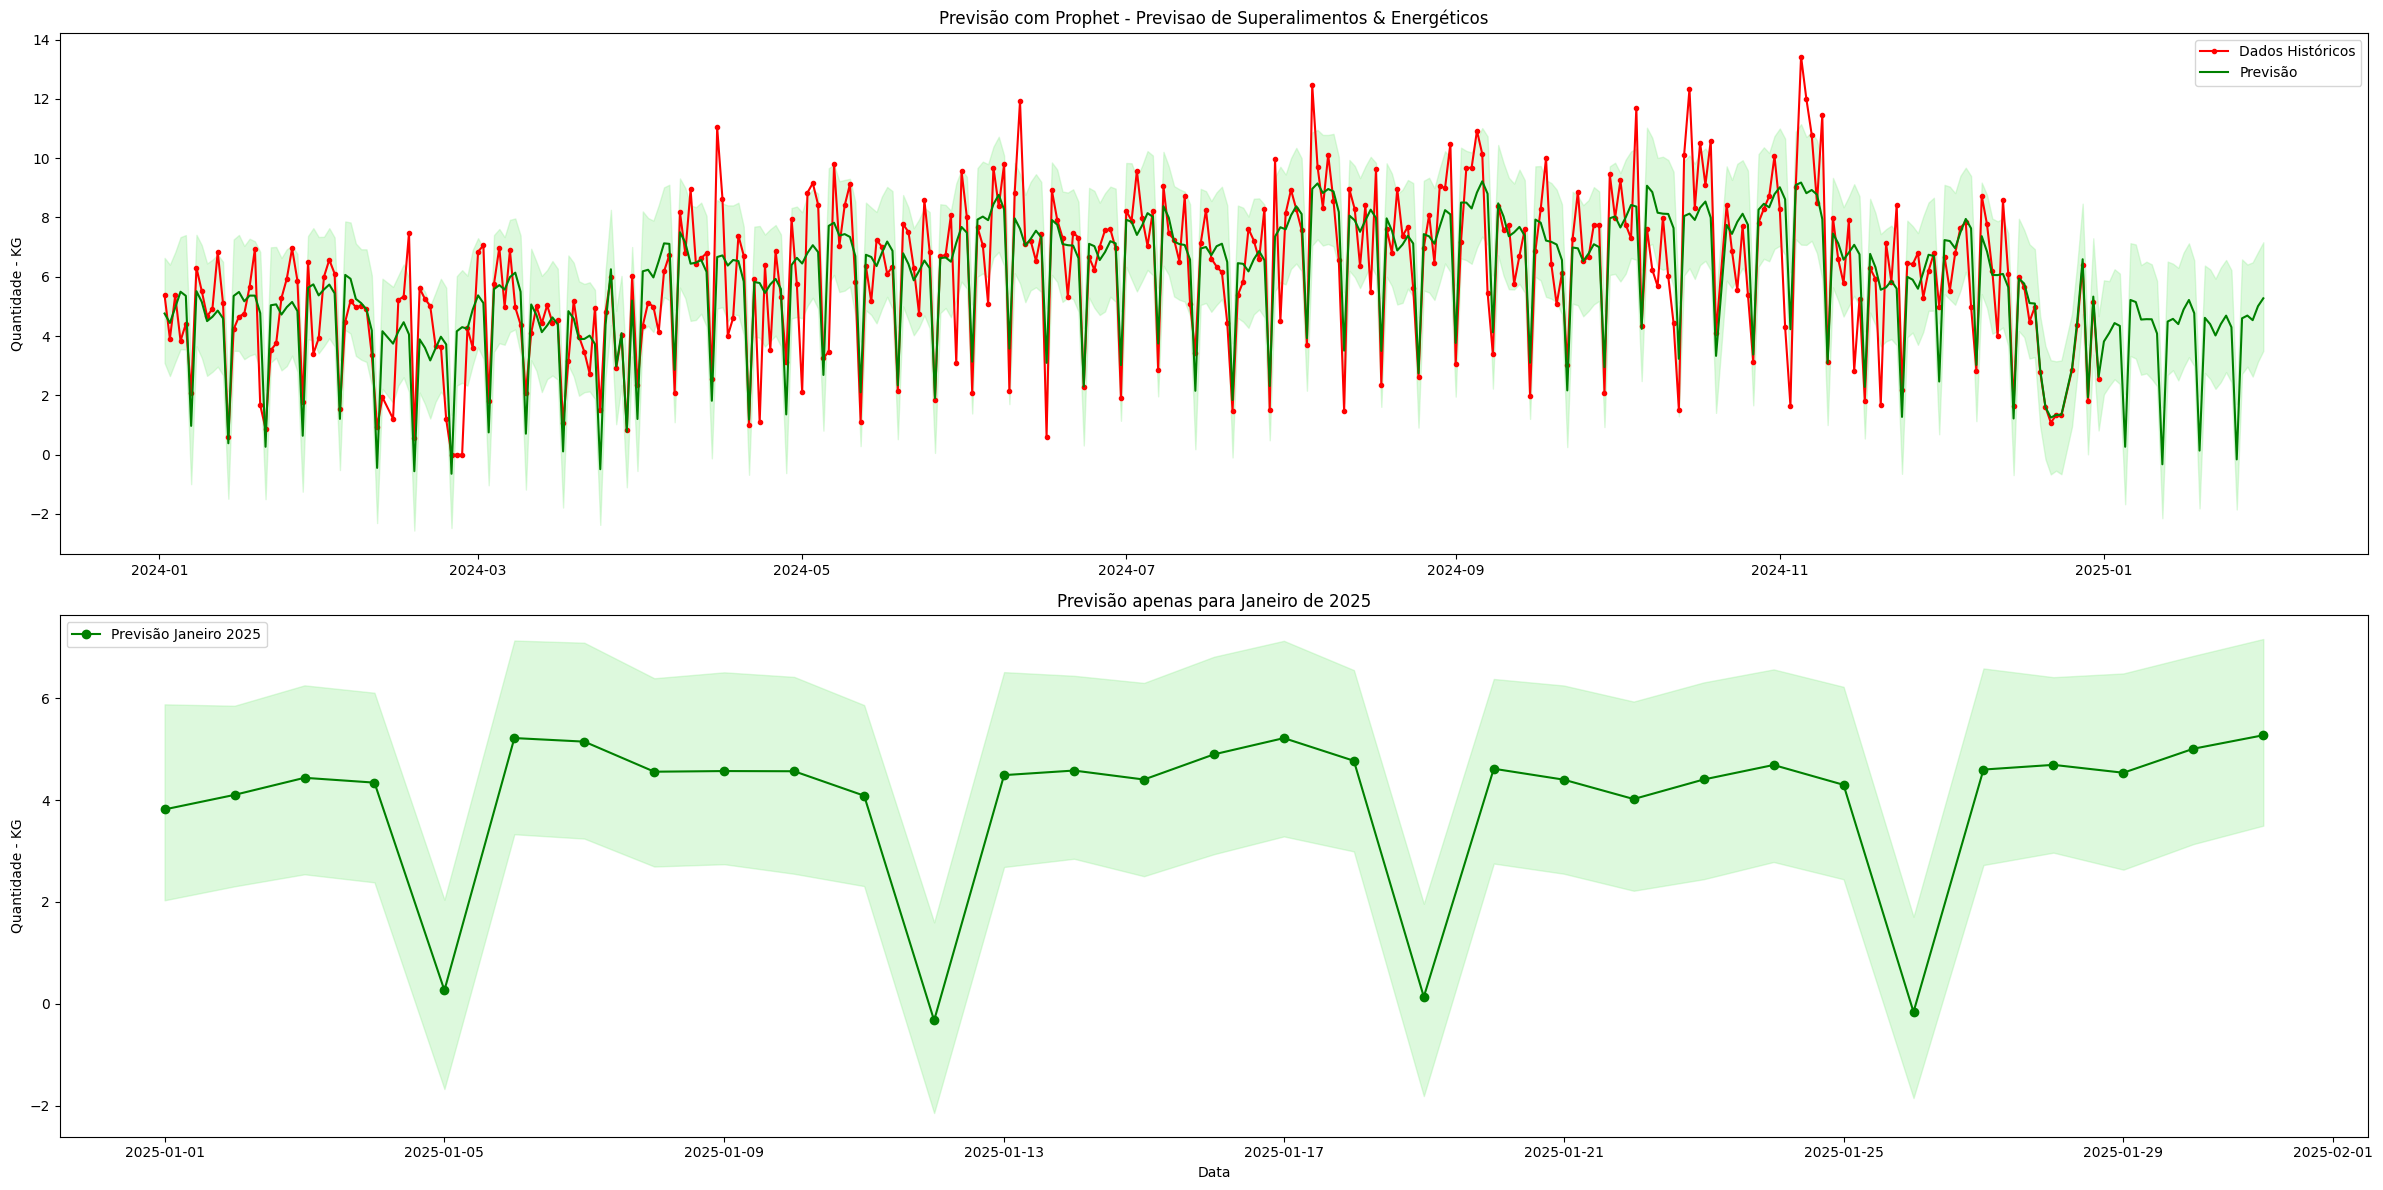

Previsão total para Janeiro/2025: 123.66 KG
Intervalo de confiança: [181.69, 66.09] KG


In [104]:
previsao('Superalimentos & Energéticos','Previsao de Superalimentos & Energéticos')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpscv3x529/somt64tg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpscv3x529/4qm75smk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26677', 'data', 'file=/tmp/tmpscv3x529/somt64tg.json', 'init=/tmp/tmpscv3x529/4qm75smk.json', 'output', 'file=/tmp/tmpscv3x529/prophet_modeli3v18auk/prophet_model-20250605231010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


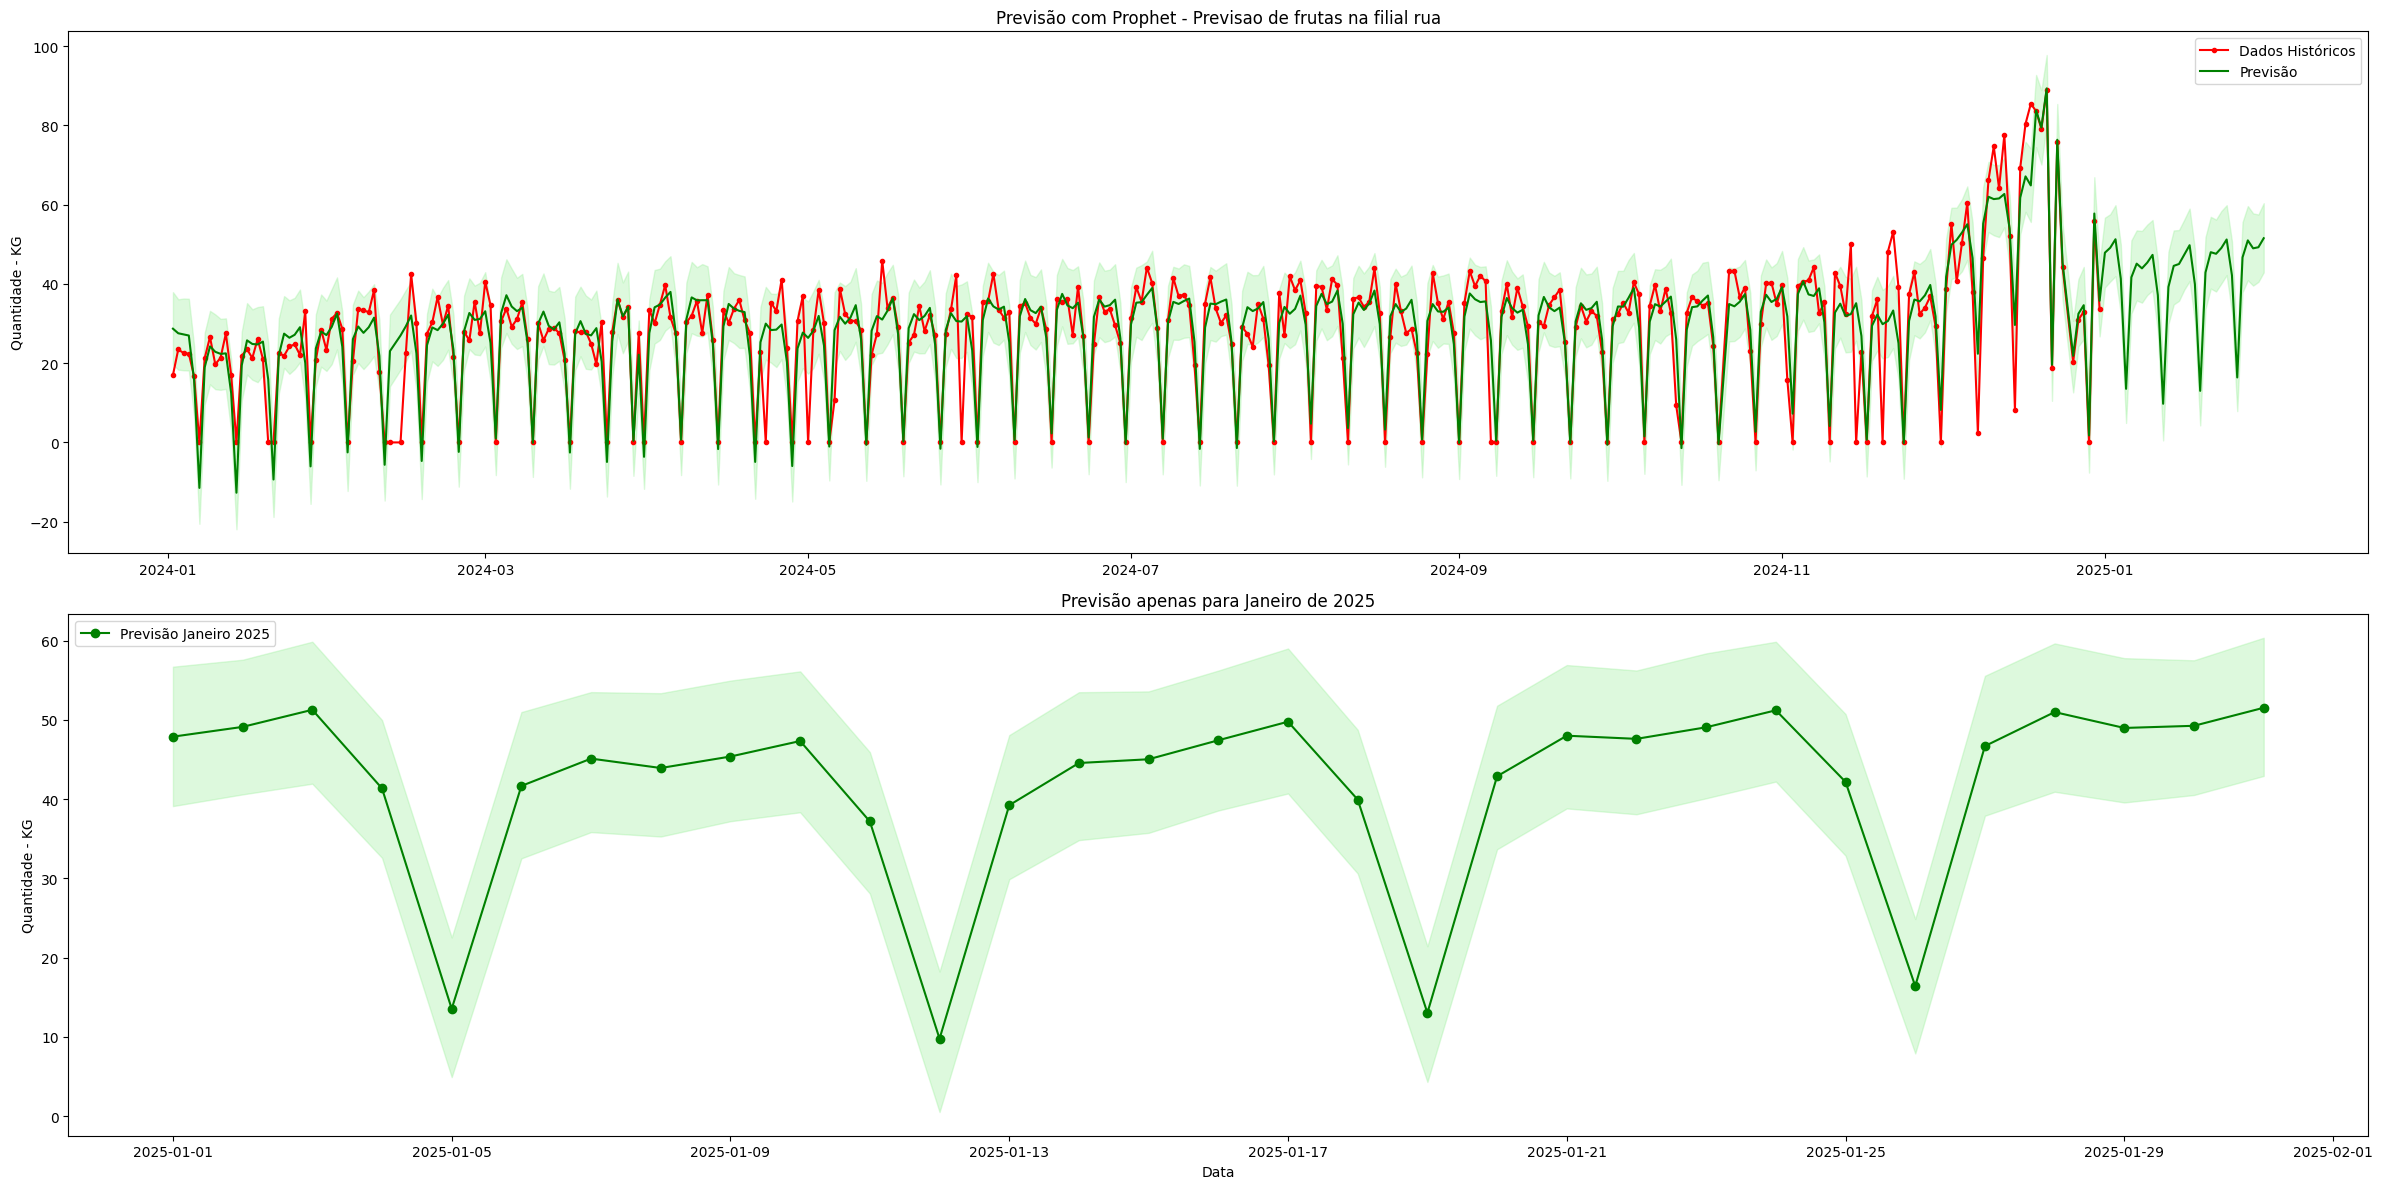

Previsão total para Janeiro/2025: 1296.89 KG
Intervalo de confiança: [1569.63, 1016.80] KG


In [105]:
previsao('Frutas_RUA','Previsao de frutas na filial rua')